




Previously, we implemented a [**Simple Tokenization**](https://github.com/nikitaprasad21/LLM-Cheat-Code/blob/main/Data-Preparation/Tokenization_Basics.ipynb) class, which wasn't able to handle OOV problems.

# Byte-Pair Encoding

GPT-2, used **BytePair encoding (BPE)** as its tokenizer. It allows the model to break down words that aren't in its predefined vocabulary into smaller subword units or even individual characters, enabling it to handle out-of-vocabulary words.

### How does it achieve this without using `<|unk|>` tokens?

The BPE algorithm, ensures that the most common words in vocabulary are represented as a single token, while rare words are breakdown into two or more subwords, if the tokenizer encounters an
unfamiliar word during tokenization.

For instance, if GPT-2's vocabulary doesn't have the word "analytical-nikita.io", it might tokenize it as `["analytical", "-", "nik", "ita", ".", "io"]` or some other subword breakdown, depending on its trained BPE merges.

The original BPE tokenizer can be found here: https://github.com/openai/gpt-2/blob/master/src/encoder.py

Since, implementing BPE can be relatively complicated. In this demonstration, we are using the BPE tokenizer from OpenAI's open-source tiktoken library (https://github.com/openai/tiktoken), which implements its core algorithms in Rust to improve computational performance.








### Importing Dataset

In this implementation I am using **The Awakening** by *Kate Chopin*, a public domain short story, written in 1899, so there is no copyright on that.

Note: It is recommended to be aware and respectful of existing copyrights and people privacy, while preparing datasets for training LLMs.

In [ ]:
import os
import urllib.request

# URL of the raw content of the markdown file
if not os.path.exists("the-awkening.txt"):
    url = ("https://raw.githubusercontent.com/mlschmitt/classic-books-markdown/main/Kate%20Chopin/The%20Awakening.md")
    file_path = "the-awkening.txt"
    urllib.request.urlretrieve(url, file_path)

with open("the-awkening.txt", "r", encoding="utf-8") as f:
    input_text = f.read()

### Importing `tiktoken`

In [ ]:
! pip3 install tiktoken

In [ ]:
import importlib
import tiktoken

print("tiktoken version:", importlib.metadata.version("tiktoken"))

tiktoken version: 0.8.0


In [ ]:
tokenizer = tiktoken.get_encoding("gpt2")

Let's instantiate a tokenizer object of SimpleTokenzier class and tokenize our sampled input text:

In [ ]:
text1 = "Hello, you're learning data science with analytical-nikita.io"
text2 = "In the sunlit terraces of the palace."

text = " <|endoftext|> ".join((text1, text2))

### Encoding

This class have an `encode` method that splits text into tokens and carries out the string-to-integer mapping to produce token IDs via the vocabulary.

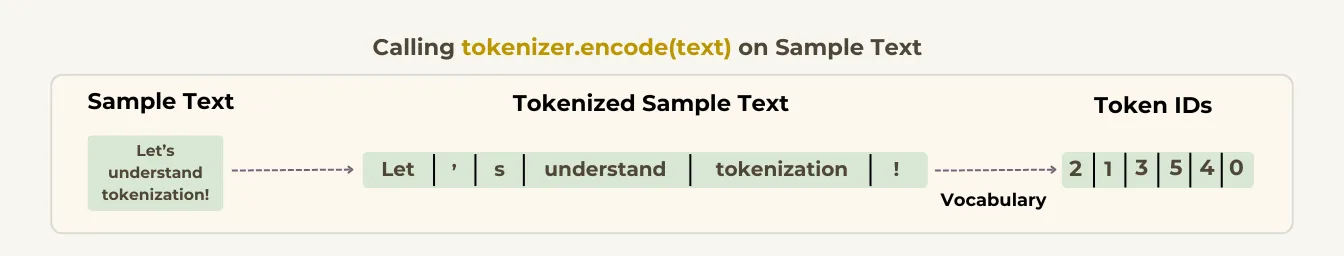

In [ ]:
token_ids = tokenizer.encode(text, allowed_special={"<|endoftext|>"})

print(token_ids)

[15496, 11, 345, 821, 4673, 1366, 3783, 351, 30063, 12, 17187, 5350, 13, 952, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 286, 262, 20562, 13]


The `<|endoftext|>` token is assigned a relatively large token ID, namely, 50256.


In fact, the BPE tokenizer, which was used to train models such as GPT-2, GPT-3,
and the original model used in ChatGPT, has a total vocabulary size of 50,257, with
`<|endoftext|>` being assigned the largest token ID.


### Decoding

We can then convert the token IDs back into text using the `decode` method, similar to our `SimpleTokenizer` that we build earlier:

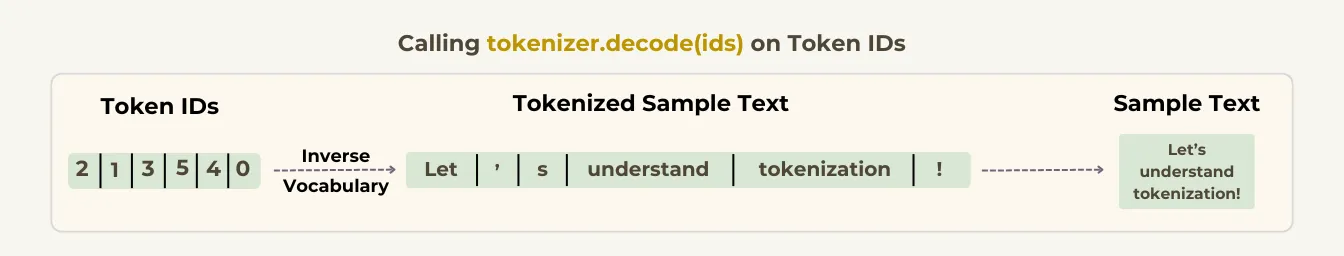

In [ ]:
output_strings = tokenizer.decode(token_ids)

print(output_strings)

Hello, you're learning data science with analytical-nikita.io <|endoftext|> In the sunlit terraces of the palace.


The algorithm underlying BPE breaks down words like `analytical-nikita.io` that aren't in its predefined vocabulary
into smaller subword units or even individual characters.

The enables it to handle out-of-vocabulary words.




> Stay tuned for more and Don't forget to Star this Github Repository for more such contents and consider sharing with others.

